# Visualisation of 3D Lake Model Output

**Date:** 2025-12-03

**Authors:** Damien Bouffard

**Summary:** This notebook provides tools to visualise 3D lake model output from the Alplakes project.

## Content:

This notebook helps you create visualizations of lake temperature and water currents. You can:

1. **Create maps** showing temperature and currents at a specific time and depth
2. **Plot time series** showing how temperature changes over time at a specific location
3. **Create transects** showing a vertical cross-section of the lake
4. **Animate transects** showing how the cross-section changes over time

## Available Functions:

- `plot_alplakes_pcolormesh(data, ...)` — Creates a map of temperature and currents for a lake at a specific time and depth
- `plot_temperature_timeseries(data, ...)` — Shows how temperature changes over time at a specific location
- `plot_alplakes_transect(data,...)` — Creates a vertical cross-section of the lake at a specific time
- `plot_alplakes_transect_timeseries(data, ...)` — Shows how a cross-section changes over time

## Before You Start:

**No Python knowledge needed!** Just follow these steps:
1. Run each cell in order (click the ▶️ button or press Shift+Enter)
2. Change the values in the examples to customize your visualizations
3. Look for the sections marked "👉 CUSTOMIZE HERE" to modify parameters

**Remaining tasks:** 
- Check transect over more than 2 coordinates
- Add map bottom temperature
- Add layer averaged temperature
- Save figures and dataset

**Issue**
- so far download works only for 2 months

---

## STEP 1: Import Required Libraries

**What this does:** This cell loads all the necessary tools (libraries) that Python needs to:
- Download data from the internet
- Process numbers and data
- Create visualizations and plots
- Handle dates and times

**What you need to do:** Simply run this cell once. You don't need to change anything here.

**How to run:** Click inside the cell below and press Shift+Enter (or click the ▶️ Run button)

In [1]:
# Import standard Python libraries for data handling and visualization
import requests          # Used to download data from the internet
import json             # Used to work with JSON data format
import numpy as np      # Used for mathematical operations and working with arrays of numbers
import matplotlib.pyplot as plt  # Used to create plots and visualizations
from matplotlib.colors import Normalize  # Used to set color scales for plots
import os               # Used to work with files and folders
from datetime import datetime  # Used to work with dates and times

# Import custom functions specifically designed for Alplakes data
# These functions do the heavy lifting for fetching and plotting data
from functions_D3D import fetch_and_save_alplakes_data_map  # Downloads map data
from functions_D3D import fetch_and_save_alplakes_point_data  # Downloads data for a specific point
from functions_D3D import plot_temperature_timeseries  # Creates time series plots
from functions_D3D import plot_alplakes_pcolormesh  # Creates map visualizations
from functions_D3D import fetch_and_save_alplakes_data_transect  # Downloads transect data
from functions_D3D import plot_alplakes_transect  # Creates transect visualizations
from functions_D3D import plot_alplakes_transect_timeseries  # Creates animated transects

print("✓ All libraries loaded successfully!")
print("You're ready to start visualizing lake data.")

✓ All libraries loaded successfully!
You're ready to start visualizing lake data.


---

## EXAMPLE 1: Creating a Map of Lake Temperature and Currents

This example creates a map showing:
- Temperature distribution across the lake (shown in colors)
- Water currents (shown as arrows)
- At a specific depth 
- At a specific time

**The process has 2 steps:**
1. Download the data from the Alplakes database
2. Create the visualization

### Step 1a: Download Map Data

**👉 CUSTOMIZE HERE:** You can change these parameters:
- `lake`: Name of the lake (e.g., 'zurich', 'geneva', 'joux')
- `data`: Date and time in format 'YYYYMMDDHHMM' (Year-Month-Day-Hour-Minute)
  - Example: '202510231500' = October 23, 2025 at 15:00 (3:00 PM)
- `depth`: Depth in meters (e.g., '1' = 1 meter below surface, '10' = 10 meters deep)
- `variables`: What to show - options are 'temperature', 'velocity', or both in a list
- `model`: The simulation model used - usually 'delft3d-flow'

In [ ]:
# ===== DOWNLOAD DATA =====
# This function connects to the Alplakes server and downloads the data

[data, lake] = fetch_and_save_alplakes_data_map(
    lake='zurich',              # 👈 CHANGE ME: Try 'geneva', 'constance', etc.
    date='202510231500',  # 👈 CHANGE ME: Format is YYYYMMDDHHMM
    depth='1',                  # 👈 CHANGE ME: Depth in meters (as a text string)
    variables=['temperature', 'velocity'],  # 👈 CHANGE ME: What data to download
    model='delft3d-flow',        # Keep this as is (the model type)
    verbose=True,                # 👈 CHANGE ME: Show download progress
    save_csv=True,              # 👈 CHANGE ME:Whether to save data as CSV file
)



print("✓ Data downloaded successfully!")

### Step 1b: Create the Visualization

**What this does:** Takes the downloaded data and creates a beautiful map with:
- Temperature shown in colors
- Arrows showing water movement (current direction and strength)

**👉 CUSTOMIZE HERE:**
- `figsize`: Size of the figure
- `plot_temp` and `plot_velocity`: plot temperature and / or vlocity
- `cmap`: type of colormap
- `quiver_scale` and 'quiver_width': scaling factor and width of the arrows (for velocity display)


In [ ]:
# ===== CREATE THE MAP =====
# This function creates a map showing temperature as colors and currents as arrows

fig, ax = plot_alplakes_pcolormesh(
    data,                           # The data we downloaded in the previous cell
    lake,                           # The lake name
    skip=3,                        # 👈 CHANGE ME: Skip every Nth arrow to reduce clutter
    figsize=(10, 6),                # 👈 CHANGE ME: Size of the figure (width, height) in inches
    plot_temp=True,                 # 👈 CHANGE ME: Show temperature as colored background (True / False)
    plot_velocity=True,             # 👈 CHANGE ME: Show water currents as arrows (True / False)  
    cmap='turbo',                   # 👈 CHANGE ME: Color map to use for temperature (you can try jet, seismic, berlin, vanimo etc)
    quiver_scale=10,                # 👈 CHANGE ME: Scale factor for the arrows (higher = smaller arrows)
    quiver_width=0.002,             # 👈 CHANGE ME: Width of the arrows
    save_fig=True,                  # 👈 CHANGE ME: Save the figure to a file (True / False
    dpi=300,                     # 👈 CHANGE ME: Resolution of the saved figure
    format='png',                    # 👈 CHANGE ME: File format if saving (png, jpg, tiff, etc)
)



# Display the plot
plt.show()

# TIP: If the plot looks too crowded with arrows, increase the 'skip' value
# TIP: If you can't see temperature variations, adjust vmin and vmax to match your data range

---

## EXAMPLE 2: Temperature Time Series at a Specific Location

Creates a graph showing how temperature changes over time at one specific location in the lake.

**Use this when you want to:**
- Track temperature changes at a monitoring station
- See daily or seasonal temperature patterns
- Compare temperature at different depths

**The process has 2 steps:**
1. Download time series data for a specific point
2. Create a line graph showing temperature vs. time

### Step 2a: Download Point Data

**👉 CUSTOMIZE HERE:**
- `lake`: Name of the lake
- `start_time` and `end_time`: Time period to analyze (format: 'YYYYMMDDHHMM')
- `lat`: Latitude coordinate (North-South position)
- `lon`: Longitude coordinate (East-West position)
- `depth`: Depth in meters (can be a single value or a list)
- `variables`: Usually 'temperature' for time series

**How to find coordinates:**
- Use Google Maps: Right-click on a location → First number is latitude, second is longitude
- Example: Zurich center is approximately lat='47.37', lon='8.54'

In [ ]:
# ===== DOWNLOAD TIME SERIES DATA =====
# This downloads temperature data for a specific location over a time period

[data, lake] = fetch_and_save_alplakes_point_data(
    lake='zurich',              # 👈 CHANGE ME: Which lake
    start_time='202504230000',  # 👈 CHANGE ME: Start date (Oct 23, 2025 at midnight)
    end_time='202510240000',    # 👈 CHANGE ME: End date (Oct 24, 2025 at midnight)
    depth=1,                   # 👈 CHANGE ME: Depth(s) to analyze (in meters)
    lat=46.5,                   # 👈 CHANGE ME: Latitude (North-South position)
    lon=6.67,                   # 👈 CHANGE ME: Longitude (East-West position)
    variables=['temperature' ],  # What to measure (temperature)
    model='delft3d-flow',        # Keep this as is (the model type)
    verbose=True,               # 👈 CHANGE ME: Show download progress
    save_csv=True,             # 👈 CHANGE ME:Whether to save data as CSV file
)



print("✓ Time series data downloaded successfully!")


API URL: https://alplakes-api.eawag.ch/simulations/point/delft3d-flow/zurich/202504230000/202510240000/1/46.5/6.67?variables=temperature
Output file: ../data/Zurich/zurich_point_202504230000_202510240000_1m.json
Fetching data from API...
✓ Data fetched successfully!
  Response length: 19103 characters
✓ Data saved to: ../data/Zurich/zurich_point_202504230000_202510240000_1m.json

Data summary:
  Time steps: 536
  Location: (47.27435791364708, 8.58300583113347)
  Depth: 0.9000000357627869 m
  Distance from requested point: 168956.8601897968 m
  Variables: ['temperature']
  Time range: 2025-04-23T00:00:00+00:00 to 2025-06-28T21:00:00+00:00
  CSV conversion: 536 time steps
✓ CSV data saved to: ../data/Zurich/lake_zurich_timeseries_2025-04-23_to_2025-06-28_depth_0.9m.csv
  - Rows: 536
  - Columns: ['lake', 'time', 'depth_m', 'latitude', 'longitude', 'distance_from_point_m', 'temperature_C']
✓ Time series data downloaded successfully!


### Step 2b: Create the Time Series Plot

Creates a line graph with:
- Time on the horizontal axis (X-axis)
- Temperature on the vertical axis (Y-axis)



✓ Figure saved to: ../figures/lake_zurich_timeseries_2025-04-23_to_2025-06-28_depth_0.9m.png
  - Format: PNG
  - Resolution: 300 DPI


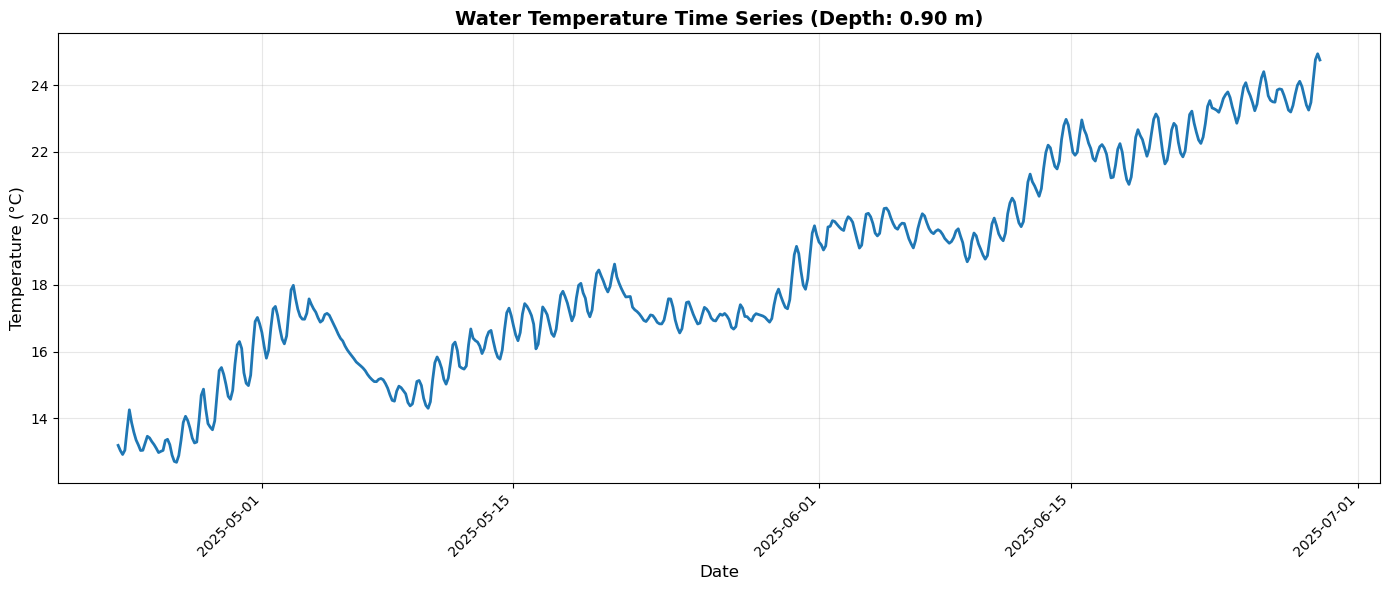

In [6]:
# ===== CREATE TIME SERIES PLOT =====
# This function creates a graph showing temperature over time

fig, ax = plot_temperature_timeseries(
    data,  # Use the data we just downloaded
    lake,  # The lake name
    figsize=(14, 6),               # 👈 CHANGE ME: Size of the figure
    save_fig=True,                  # 👈 CHANGE ME: Save the figure to a file (True / False)
    dpi=300,                     # 👈 CHANGE ME: Resolution of the saved figure 
    format='png'                   # 👈 CHANGE ME: File format if saving (png, jpg, tiff, etc
)




# Display the plot
plt.show()



---

## EXAMPLE 3: Creating a Transect (Vertical Cross-Section)

Creates a vertical "slice" through the lake showing:
- Temperature from surface to bottom
- How temperature varies along a line between two points
- Water currents in the vertical plane

**Use this when you want to:**
- See temperature stratification (layers)
- Visualize how deep the warm surface layer extends
- Understand vertical mixing patterns


### Step 3a: Download Transect Data

**👉 CUSTOMIZE HERE:**
- `lake`: Name of the lake
- `start_time` and `end_time`: Time period for the transect
- `lat`: List of latitude coordinates [start_point, end_point]
  - These define where your vertical slice cuts through the lake
- `lon`: List of longitude coordinates [start_point, end_point]
- `variables`: What to show (usually temperature and/or velocity)

**Example:** To create a transect across Lake Geneva from west to east:
- Start point (west): lat='46.37', lon='6.56'
- End point (east): lat='46.54', lon='6.54'

In [ ]:
# ===== DOWNLOAD TRANSECT DATA =====
# This downloads data along a line between two points, from surface to bottom

[data, lake] = fetch_and_save_alplakes_data_transect(
    lake='geneva',              # 👈 CHANGE ME: Which lake
    start_time='202510231500',  # 👈 CHANGE ME: Start of time period
    end_time='202510241500',    # 👈 CHANGE ME: End of time period
    lat=['46.37', '46.54'],     # 👈 CHANGE ME: [start_latitude, end_latitude]
    lon=['6.56', '6.54'],       # 👈 CHANGE ME: [start_longitude, end_longitude]
    variables=['temperature', 'velocity'],  # 👈 CHANGE ME: What to visualize
    model='delft3d-flow'
)

print("✓ Transect data downloaded successfully!")

# TIP: To create a north-south transect, keep longitude constant and vary latitude
# TIP: To create an east-west transect, keep latitude constant and vary longitude

### Step 3b: Create the Transect Visualization

**What this does:** Creates a cross-sectional view with:
- Horizontal axis showing distance along the transect
- Vertical axis showing depth (0 at surface, increasing downward)
- Colors showing temperature (blue = cold, red = warm)
- Optional arrows showing vertical water movement

**👉 CUSTOMIZE HERE:**
- `time`: Which timestamp to display (must be within your downloaded time range)

**Reading the plot:**
- Top of plot = water surface
- Bottom of plot = lake bottom
- Horizontal color bands = temperature layers (stratification)
- Color changes show where different water masses meet

In [ ]:
# ===== CREATE TRANSECT VISUALIZATION =====
# This function creates a vertical cross-section showing temperature and currents

fig, ax = plot_alplakes_transect(
    data,                        # Use the transect data we downloaded
    lake,                        # The lake name
    time='2025-10-23 18:00:00',  # 👈 CHANGE ME: Which time to display
    figsize=(16, 8),             # 👈 CHANGE ME: Size of the figure
    plot_temp=True,              # 👈 CHANGE ME: Show temperature as colored background (True / False
    plot_velocity=True,          # 👈 CHANGE ME: Show water currents as arrows (True / False)
    cmap='turbo',                  # 👈 CHANGE ME: Color map for temperature   
    quiver_scale=6,             # 👈 CHANGE ME: Scale factor for the arrows (higher = smaller arrows)
    quiver_width=0.002,          # 👈 CHANGE ME: Width of the arrows
    alpha_quiver=0.6,             # 👈 CHANGE ME: Transparency of the arrows
    save_fig=True,               # 👈 CHANGE ME: Save the figure to a file (True / False)
    dpi=300,                     # 👈 CHANGE ME: Resolution of the saved figure
    format='png'                  # 👈 CHANGE ME: File format if saving (png, jpg, etc.)    
)

# Display the plot
plt.show()


---

## EXAMPLE 4: Creating Transects (Vertical Cross-Section) at different times
    
 Creates vertical "slice" through the lake showing:
- Temperature from surface to bottom
- How temperature varies along a line between two points
- Water currents in the vertical plane

**Use this when you want to:**
- See temperature stratification (layers)
- Visualize how deep the warm surface layer extends
- Understand vertical mixing patterns


### Step 4a: Download Transect Data

**👉 CUSTOMIZE HERE:**
- `lake`: Name of the lake
- `start_time` and `end_time`: Time period for the transect
- `lat`: List of latitude coordinates [start_point, end_point]
  - These define where your vertical slice cuts through the lake
- `lon`: List of longitude coordinates [start_point, end_point]
- `variables`: What to show (usually temperature and/or velocity)

**Example:** To create a transect across Lake Geneva from west to east:
- Start point (west): lat='46.37', lon='6.56'
- End point (east): lat='46.54', lon='6.54'

In [ ]:
[data, lake] = fetch_and_save_alplakes_data_transect(
    lake='geneva',            # 👈 CHANGE ME: Which lake
    start_time='202510231500', # 👈 CHANGE ME: Start of time period
    end_time='202510301500',   # 👈 CHANGE ME: End of time period
    lat=['46.37', '46.54'],    # 👈 CHANGE ME: Latitude range
    lon=['6.56', '6.54'],      # 👈 CHANGE ME: Longitude range
    variables=['temperature', 'velocity'],
    model='delft3d-flow')



### Step 4b: Create Transect Visualization over time

Creates a cross-sectional view with:
- Horizontal axis showing distance along the transect
- Vertical axis showing depth (0 at surface, increasing downward)
- Colors showing temperature (blue = cold, red = warm)
- Optional arrows showing vertical water movement

**👉 CUSTOMIZE HERE:**
- `time`: Which timestamp to display (must be within your downloaded time range)



In [ ]:

fig, axes = plot_alplakes_transect_timeseries(
    data,
    lake,
    figsize=(16, 8),                                      # 👈 CHANGE ME: Size of the figure
    plot_temp=True,                                       # 👈 CHANGE ME: Show temperature as colored background
    plot_velocity=True,                                   # 👈 CHANGE ME: Show water currents as arrows
    cmap='turbo',                                         # 👈 CHANGE ME: Color map to use
    levels=20,                                            # 👈 CHANGE ME: Number of contour levels
    time_range=('2025-10-23 15:00', '2025-10-30 09:00'),    # 👈 CHANGE ME: Time range to display
    time_step='24h',                                        # 👈 CHANGE ME: Every 24 hours with Δt shown
    quiver_scale=10,                                      # 👈 CHANGE ME: Scale factor for the arrows   
    quiver_width=0.002,                                   # 👈 CHANGE ME: Width of the arrows   
    alpha_quiver=0.6,                                     # 👈 CHANGE ME: Transparency of the arrows    
    save_fig=True,                                       # 👈 CHANGE ME: Save the figure to a file
    dpi=300,                                              # 👈 CHANGE ME: Resolution of the saved figure
    format='png'                                          # 👈 CHANGE ME: File format if saving (png, jpg, tiff, etc  )
    )
plt.show()



